In [1]:
from virusPropagationModel import *
import VPM_plotting as vpm_plot
%matplotlib inline
%load_ext autoreload
import glob
import os
import copy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
#%load_ext memory_profiler

In [2]:
geopath = 'datafiles/'
geofiles = {0:'Buildings_Gangelt_MA_1.csv',
            1:'Buildings_Gangelt_MA_3.csv',
           }         

In [3]:
world_to_pick = 0

n_initially_infected=0
modeledWorld= ModeledPopulatedWorld(1000,n_initially_infected, world_from_file=True, geofile_name=geopath+geofiles[world_to_pick], agent_agent_infection=True, input_schedules='schedules_v2',automatic_initial_infections=False)
n_people = modeledWorld.number_of_people
print('Number of agents: '+ str(n_people))

Number of agents: 10393


In [4]:
modeledWorld.initialize_infection(amount=1, specific_people_ids=[1,2],strain='WT')
modeledWorld.initialize_infection(amount=1, specific_people_ids=[3,4],strain='M')

In [5]:
timesteps=600
general_infectivity=0.3
general_interaction_frequency=2

In [6]:
simulation = Simulation(copy.deepcopy(modeledWorld),timesteps,run_immediately=False)
simulation.change_agent_attributes({'all':{'behaviour_as_infected':{'value':general_infectivity,'type':'replacement'}}})
simulation.interaction_frequency=general_interaction_frequency


In [7]:
simulation.simulate()


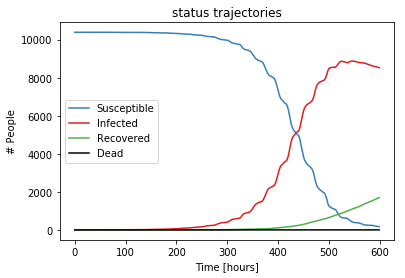

In [8]:
simulation.plot_status_timecourse()


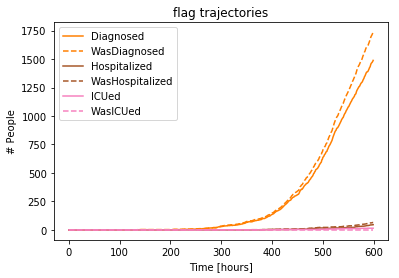

In [9]:
simulation.plot_flags_timecourse(specific_flags=['Diagnosed','WasDiagnosed','Hospitalized','WasHospitalized','ICUed','WasICUed'])


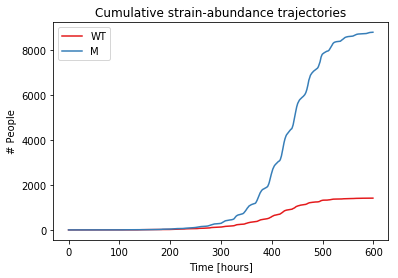

In [10]:
simulation.plot_strains_timecourse(type='cumulative')

In [45]:
n_initially_infected=4
modeledWorld= ModeledPopulatedWorld(1000,n_initially_infected, world_from_file=True, geofile_name=geopath+geofiles[world_to_pick], agent_agent_infection=True, input_schedules='schedules_v2',automatic_initial_infections=False)
n_people = modeledWorld.number_of_people
print('Number of agents: '+ str(n_people))

Number of agents: 10318


In [46]:
modeledWorld.initialize_infection(amount=1, specific_people_ids=[1,2,3],strain='WT')
modeledWorld.initialize_infection(amount=1, specific_people_ids=[4],strain='M')

In [47]:
timesteps=500
simulation.change_agent_attributes({'all':{'behaviour_as_infected':{'value':general_infectivity,'type':'replacement'}}})
simulation.interaction_frequency=general_interaction_frequency

simulation = Simulation(copy.deepcopy(modeledWorld),timesteps,run_immediately=True)



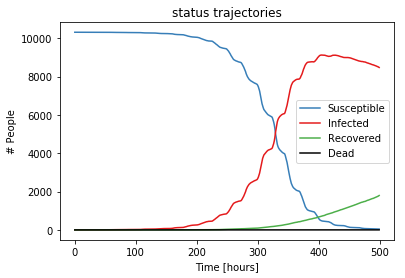

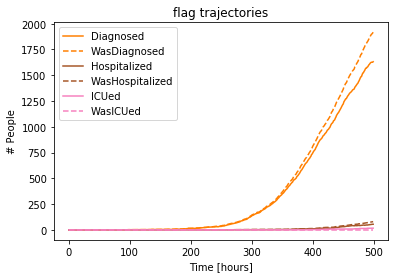

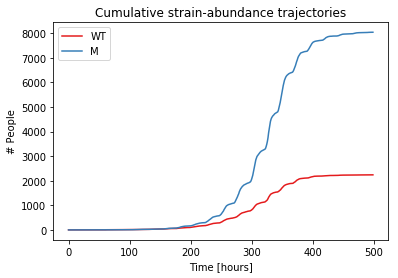

In [48]:
simulation.plot_status_timecourse()
simulation.plot_flags_timecourse(specific_flags=['Diagnosed','WasDiagnosed','Hospitalized','WasHospitalized','ICUed','WasICUed'])
simulation.plot_strains_timecourse(type='cumulative')


In [42]:
inf_info=simulation.get_infection_event_information()
last_infected=inf_info.iloc[-1,:]
print(last_infected)
last_infected_human=last_infected['h_ID']



h_ID                2229
infection_loc_ID    1106
infected_by_ID      2228
Name: 198, dtype: int64


In [43]:
for p in list(simulation.people): 
    if p.ID == last_infected_human:
        p.infection_strain='M'

simulation.time_steps=300
simulation.simulate()

        

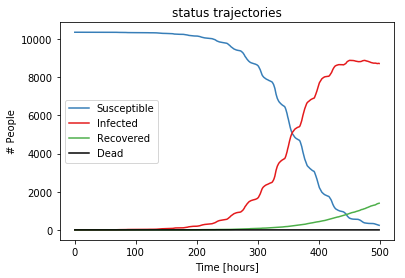

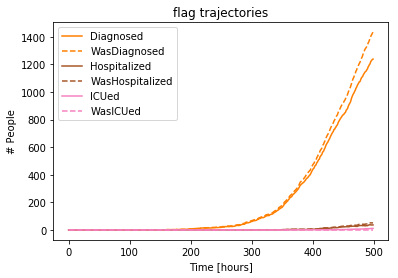

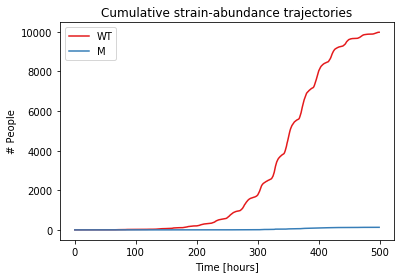

In [44]:
simulation.plot_status_timecourse()
simulation.plot_flags_timecourse(specific_flags=['Diagnosed','WasDiagnosed','Hospitalized','WasHospitalized','ICUed','WasICUed'])
simulation.plot_strains_timecourse(type='cumulative')



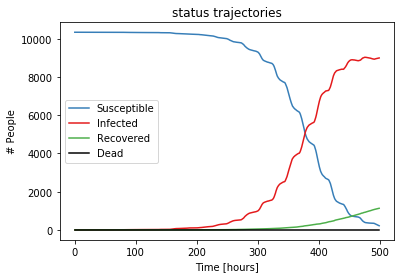

In [32]:
simulation.plot_status_timecourse()



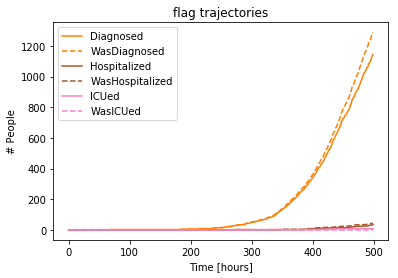

In [33]:
simulation.plot_flags_timecourse(specific_flags=['Diagnosed','WasDiagnosed','Hospitalized','WasHospitalized','ICUed','WasICUed'])



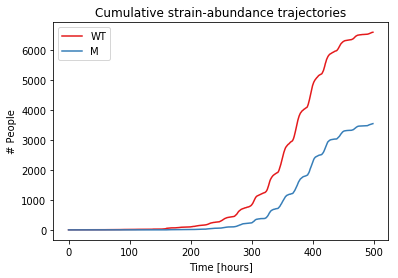

In [34]:
simulation.plot_strains_timecourse(type='cumulative')



In [31]:
simulation.get_strain_sums_over_time(type='cumulative')

,WT,M
time,,
0,4.0,0.0
1,4.0,0.0
2,4.0,0.0
3,4.0,0.0
4,4.0,0.0
...,...,...
495,6562.0,3516.0
496,6571.0,3523.0
497,6582.0,3530.0
